In [67]:
import coloredlogs, logging
import pandas as pd
from collections import Counter
from tqdm.notebook import tqdm
from IPython.display import HTML, display

# Create a logger object.
logger = logging.getLogger(__name__)

# By default the install() function installs a handler on the root logger,
# this means that log messages from your code and log messages from the
# libraries that you use will all show up on the terminal.
coloredlogs.install(level='DEBUG', logger=logger)

logger.debug("Welcome to program")

AVAILABLE_X = 70
AVAILABLE_Y = 70
AVAILABLE_AREA = 40 * 70
FILL_RATIO = 0.75

2024-04-05 11:53:47 pp2233 __main__[57470] DEBUG Welcome to program


In [68]:
df = pd.read_csv('panels2.csv').dropna(subset='Current')
df.drop(index=0, inplace=True)
df = df.apply(pd.to_numeric, errors='ignore')
df.sort_values(by=['Area'], inplace=True, ignore_index=True)
df.drop(columns=['Datasheet'])

,Panel,Voltage,Current,Power,Dimen Long,Dimen Short,Unnamed: 7,Area,Efficacy,Unnamed: 10,Effective width (compared to max efficacy),Unnamed: 12,Unnamed: 13
0,KXOB25-04X3F-TR,1.67,13.2,22.0,22.0,7.0,NaN,154,143.14,NaN,15,NaN,NaN
1,KXOB25-12X1F-TR,0.56,43.9,24.6,22.0,7.0,NaN,154,159.64,NaN,17,NaN,NaN
2,KXOB25-01X8F-TB,4.46,5.5,24.5,22.0,7.0,NaN,154,159.29,NaN,17,NaN,NaN
3,KXOB25-02X8F-TB,4.46,6.3,28.1,23.0,8.0,NaN,184,152.71,NaN,17,NaN,NaN
4,KXOB25-03X4F-TR,2.23,13.5,30.1,23.0,8.0,NaN,184,163.61,NaN,18,NaN,NaN
5,KXOB25-05X3F-TR,1.67,18.4,30.7,23.0,8.0,NaN,184,167.00,NaN,18,NaN,NaN
6,KXOB25-14X1F-TR,0.56,55.0,30.8,23.0,8.0,NaN,184,167.39,NaN,18,NaN,NaN
7,SM400K10L,5.58,15.4,86.0,33.0,15.0,NaN,495,173.60,NaN,27,NaN,NaN
8,SM340K10L,5.58,13.2,74.0,34.0,16.0,NaN,544,135.40,NaN,22,NaN,NaN
9,KXOB121K04F-TR,2.23,47.2,105.0,25.0,23.0,NaN,575,183.05,NaN,22,NaN,NaN


In [69]:
def mysum(combination, attr):
    return df.loc[combination, attr].astype('float').sum()

In [78]:
combinations = [ ]

pbar = tqdm(list(df.iterrows()))

def investigate_combination(combi):
    start = combi[-1]
    for idx, panel in df.loc[start:].iterrows():
        combi2 = combi.copy()
        combi2.append(idx)

        # Are all elements in combi2 equal?
        if len(set(combi2)) > 2:
            continue
        
        area = mysum(combi2, 'Area')

        if area >= AVAILABLE_AREA:
            break
            
        investigate_combination(combi2)
            
        if area < AVAILABLE_AREA * FILL_RATIO:
            continue
            
            
        
        combinations.append({
            "Combination": combi2,
            "Area": area,
            "Power": mysum(combi2, 'Power')
        })
        pbar.set_postfix_str("{} combinations found / depth = {}. {}".format(len(combinations), len(combi2), combi), refresh=True)

for idx, panel in pbar:
    investigate_combination([ idx ])
            
    

  0%|          | 0/36 [00:00<?, ?it/s]

In [79]:
combinations

[{'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'Area': 2772.0,
  'Power': 396.0},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  'Area': 2772.0,
  'Power': 398.6},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
  'Area': 2772.0,
  'Power': 398.5},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  'Area': 2618.0,
  'Power': 374.0},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
  'Area': 2772.0,
  'Power': 401.20000000000005},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  'Area': 2618.0,
  'Power': 376.6},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2],
  'Area': 2772.0,
  'Power': 401.0},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
  'Area': 2618.0,
  'Power': 376.5},
 {'Combination': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
  'Area': 2648.0,
  'Power': 380.1},
 {'Combin

In [91]:
parsed_combinations = pd.DataFrame(combinations)
pc = parsed_combinations
pc['Fill Ratio'] = pc['Area'] / AVAILABLE_AREA
pc['Empty Ratio'] = 1-pc['Fill Ratio']
pc['Efficacy'] = pc['Power'] / pc['Area']
pc

,Combination,Area,Power,Fill Ratio,Empty Ratio,Efficacy
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2772.0,396.0,0.990000,0.010000,0.142857
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2772.0,398.6,0.990000,0.010000,0.143795
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2772.0,398.5,0.990000,0.010000,0.143759
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2618.0,374.0,0.935000,0.065000,0.142857
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2772.0,401.2,0.990000,0.010000,0.144733
...,...,...,...,...,...,...
3516,"[29, 30]",2573.0,440.0,0.918929,0.081071,0.171007
3517,"[29, 31]",2576.0,466.0,0.920000,0.080000,0.180901
3518,"[30, 30]",2604.0,440.0,0.930000,0.070000,0.168971
3519,"[30, 31]",2607.0,466.0,0.931071,0.068929,0.178750


In [92]:
#pc.sort_values(by=['Power', 'Empty Ratio'], inplace=True, ascending=False)
pc.sort_values(by=['Efficacy'], inplace=True, ascending=False)
pc

,Combination,Area,Power,Fill Ratio,Empty Ratio,Efficacy
3365,"[15, 15, 15]",2310.0,489.0,0.825000,0.175000,0.211688
1228,"[1, 15, 15, 15]",2464.0,513.6,0.880000,0.120000,0.208442
2939,"[6, 15, 15, 15]",2494.0,519.8,0.890714,0.109286,0.208420
1735,"[2, 15, 15, 15]",2464.0,513.5,0.880000,0.120000,0.208401
2712,"[5, 15, 15, 15]",2494.0,519.7,0.890714,0.109286,0.208380
...,...,...,...,...,...,...
539,"[0, 0, 0, 8, 8, 8, 8]",2638.0,362.0,0.942143,0.057857,0.137225
591,"[0, 0, 8, 8, 8, 8]",2484.0,340.0,0.887143,0.112857,0.136876
639,"[0, 8, 8, 8, 8]",2330.0,318.0,0.832143,0.167857,0.136481
3039,"[8, 8, 8, 8]",2176.0,296.0,0.777143,0.222857,0.136029


In [94]:
import rpack
#import rpack.misc.recstat

finds = 0

for idx, combi in pc.iterrows():
    combination = combi['Combination']
    #print(combination)
    
    if combi['Area'] >= AVAILABLE_AREA:
        continue
        
    if len(Counter(combination)) > 1:
        continue
    
    panels = df.iloc[combination]
    panels_orig = panels
    panels = panels[['Dimen Long', 'Dimen Short']]
    panels = list(panels.astype('int').itertuples(index=False, name=None))
    
    try:
        positions = rpack.pack(panels, max_width=AVAILABLE_X, max_height=AVAILABLE_Y)
    except:
        try:
            positions = rpack.pack(panels, max_width=AVAILABLE_Y, max_height=AVAILABLE_X)
        except:
            continue
            
    print(panels)
    print(positions)

    bbox = rpack.bbox_size(panels, positions)
    density = rpack.packing_density(panels, positions)

    print("Bounding Box = {}, density = {}".format(bbox, density))

    print(len(Counter(combination)))
    print("Found on combination #{}".format(idx))
    display(combi)
    display(panels_orig)
    finds += 1

    if finds >= 1:
        break
    


[(35, 22), (35, 22), (35, 22)]
[(0, 0), (0, 22), (0, 44)]
Bounding Box = (35, 66), density = 1.0
1
Found on combination #3365


Combination    [15, 15, 15]
Area                 2310.0
Power                 489.0
Fill Ratio            0.825
Empty Ratio           0.175
Efficacy           0.211688
Name: 3365, dtype: object

,Panel,Voltage,Current,Power,Dimen Long,Dimen Short,Datasheet,Unnamed: 7,Area,Efficacy,Unnamed: 10,Effective width (compared to max efficacy),Unnamed: 12,Unnamed: 13
15,SM141K05L,2.79,58.6,163.0,35.0,22.0,https://waf-e.dubudisk.com/anysolar.dubuplus.c...,NaN,770,212.33,NaN,35,NaN,KXOB series: SMT capable series. Fixed form fa...
15,SM141K05L,2.79,58.6,163.0,35.0,22.0,https://waf-e.dubudisk.com/anysolar.dubuplus.c...,NaN,770,212.33,NaN,35,NaN,KXOB series: SMT capable series. Fixed form fa...
15,SM141K05L,2.79,58.6,163.0,35.0,22.0,https://waf-e.dubudisk.com/anysolar.dubuplus.c...,NaN,770,212.33,NaN,35,NaN,KXOB series: SMT capable series. Fixed form fa...


In [95]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import  matplotlib.animation as mani

def rectangle_color(w, h):
    r = min(w, h)/max(w, h)/2
    if h < w:
        r = 1 - r
    r = r/2 + 0.3
    return plt.get_cmap('viridis')(r)

class PlotPacking:

    def __init__(self, rec, pos, gridlines=False, title='', trim=False):
        """Initialization of PlotPacking"""
        self.rec = rec
        self.pos = pos
        self.gridlines = gridlines
        self.index = None
        self.encl_w, self.encl_h = rpack.enclosing_size(rec, pos)
        self.density = sum(w*h for w, h in rec)/(self.encl_w*self.encl_h)
        if trim:
            self.fig = plt.figure(figsize=(6, 6*self.encl_h/self.encl_w))
            self.ax = self.fig.add_axes([0.01, 0.01, 0.98, 0.98])
        else:
            self.fig, self.ax = plt.subplots(tight_layout=True)
            self.ax.set_aspect('equal')
        self.ax.invert_yaxis()
        self.ax.set_xlim([0, self.encl_w])
        self.ax.set_ylim([self.encl_h, 0])
        self.ax.xaxis.set_visible(False)
        self.ax.yaxis.set_visible(False)
        if title and not trim:
            self.ax.set_title(
                f'Packing density {100*self.density:.2f}% '
                f'({self.encl_w} x {self.encl_h})' + title)

    def feed(self, *args):
        artists = list()
        if self.index is None:
            self.index = 0
            return [self.ax]
        try:
            w, h = self.rec[self.index]
            x, y = self.pos[self.index]
        except IndexError:
            return []
        else:
            p = patches.Rectangle(
                (x, y), w, h,
                edgecolor='k',
                facecolor=rectangle_color(w, h)
            )
            self.ax.add_patch(p)
            artists.append(p)
            if self.gridlines:
                hline = self.ax.axhline(y+h, color='k', linestyle='-', linewidth=0.5)
                vline = self.ax.axvline(x+w, color='k', linestyle='-', linewidth=0.5)
                artists.append(hline)
                artists.append(vline)
            self.index += 1
            return artists
    
    def display(self):
        plt.show()

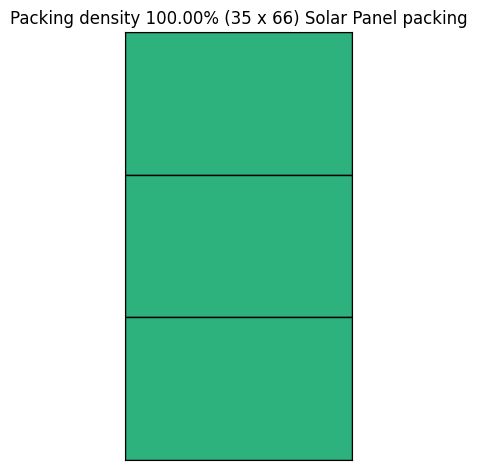

In [96]:
pp = PlotPacking(panels, positions, title=' Solar Panel packing')
while len(pp.feed()) >= 1:
    pass
pp.display()